# Exploration et visualisation de l'évolution des effectifs des étudiant·e·s des universités suisses (1891-1991)


Le fichier "Z.22b Etudiants par université, genre et origine, de 1891/92 à 1990/91" utilisé pour cet exercice est tiré du site web [Statistique historique de la Suisse](https://hsso.ch/fr/2012/z). Il contient des données agrégées concernant la fréquentation des Universités suisses et les effectifs des étudiant·e·s.

Le fichier à analyser a été préparé dans le carnet *sciences_historiques_numeriques/histoire_numerique_methodes/manipuler_les_fichiers/fichier_csv_lire_et_ecrire.ipynb*

### Questions à poser préalablement

* Quelles entités dans la réalité?
* Quels individus statistiques et quelles propriétés?


### Entités de la réalité

* Personne (pk_personne, nom, genre, nationalité)
* Université (pk_université, nom)
* Immatriculation (pk_immatriculation, fk_personne, fk_universite, année universitaire)

### Individus statistiques

* Universités
  * Propriétés: effectif étudiants, effectif étudiantes, effectif étudiant·e·s étrangers

In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np

### Lire le fichier préparé préalablement

Cf. le carnet "manipuler_les_fichiers/fichier_csv_lire_et_ecrire.ipynb"

In [2]:
### Lire le fichier créé précédemment contenant l'effectif des étudiants hommes
file_1 = '../manipuler_les_fichiers/donnees/etudiantes_universites_suisses_v2.csv'

In [3]:
with open(file_1, 'r') as data:
      a = csv.DictReader(data, delimiter='\t')
      d = list(a)
len(d), d[0]

(100,
 {'Année': '1891/92',
  'Zürich': '543',
  'Basel': '401',
  'Genf': '536',
  'Bern': '534',
  'Lausanne': '289',
  'Freiburg': '168',
  'Neuenburg': '60',
  'Total': '2531',
  'Zurich_f': '67',
  'Bâle_f': '1',
  'Genève_f': '89',
  'Berne_f': '80',
  'Lausanne_f': '5',
  'Fribourg_f': '0',
  'Neuchâtel_f': '0',
  'Total_f': '242',
  'Zürich_e': '192',
  'Basel_e': '75',
  'Genf_e': '347',
  'Bern_e': '126',
  'Lausanne_e': '89',
  'Freiburg_e': '56',
  'Neuenburg_e': '1',
  'Total_e': '886',
  'Total_h': '2289'})

## Préparer les données pour la visualisation avec un diagramme de dispersion

Dans cette première visualisation nous volons utiliser un diagramme de dispersion (scatterplot) avec les diamètres des points proportionnels aux effectifs des étudiant·e·s. Aussi nous voulons comparer l'évolution dans le temps, dans la logique d'une série temporelle, entre les immatriculations des hommes et des femmes.


Nous utilisons ici des variables nominales (les genres) et qualitative ordinales (les années universitaires), donc on aura un diagramme de dispersion affichant des variables catégorielles. Il faut donc un point par année et par genre, et on affichera l'effectif de ce point. Il est donc nécessaire de 'construire' artificiellement les valeurs des ordinnées (les point des genres).

In [4]:
abscisses = []
for l in d:
    abscisses.append(l['Année'])
len(abscisses), abscisses[:3]

(100, ['1891/92', '1892/93', '1893/94'])

In [5]:
### on créé une série de valeurs catégorielles correspondant aux années
#  100 hommes = 100 femmes
ordonnees=[]
ordonnees = ['étudiants'] * len(abscisses) + ['étudiantes'] * len(abscisses)
len(ordonnees), ordonnees[:4]

(200, ['étudiants', 'étudiants', 'étudiants', 'étudiants'])

In [6]:
### on prépare ici les effectifs des étudiant·e·s
eff_etudiants = []
for l in d:
    eff_etudiants.append(int(l['Total_h']))

eff_etudiantes = []
for l in d:
    eff_etudiantes.append(int(l['Total_f']))
    
eff = eff_etudiants + eff_etudiantes
len(eff)

200

In [7]:
abscisses_2 = abscisses * 2
len(abscisses_2)

200

In [8]:
eff_etudiantes[:3]

[242, 294, 345]

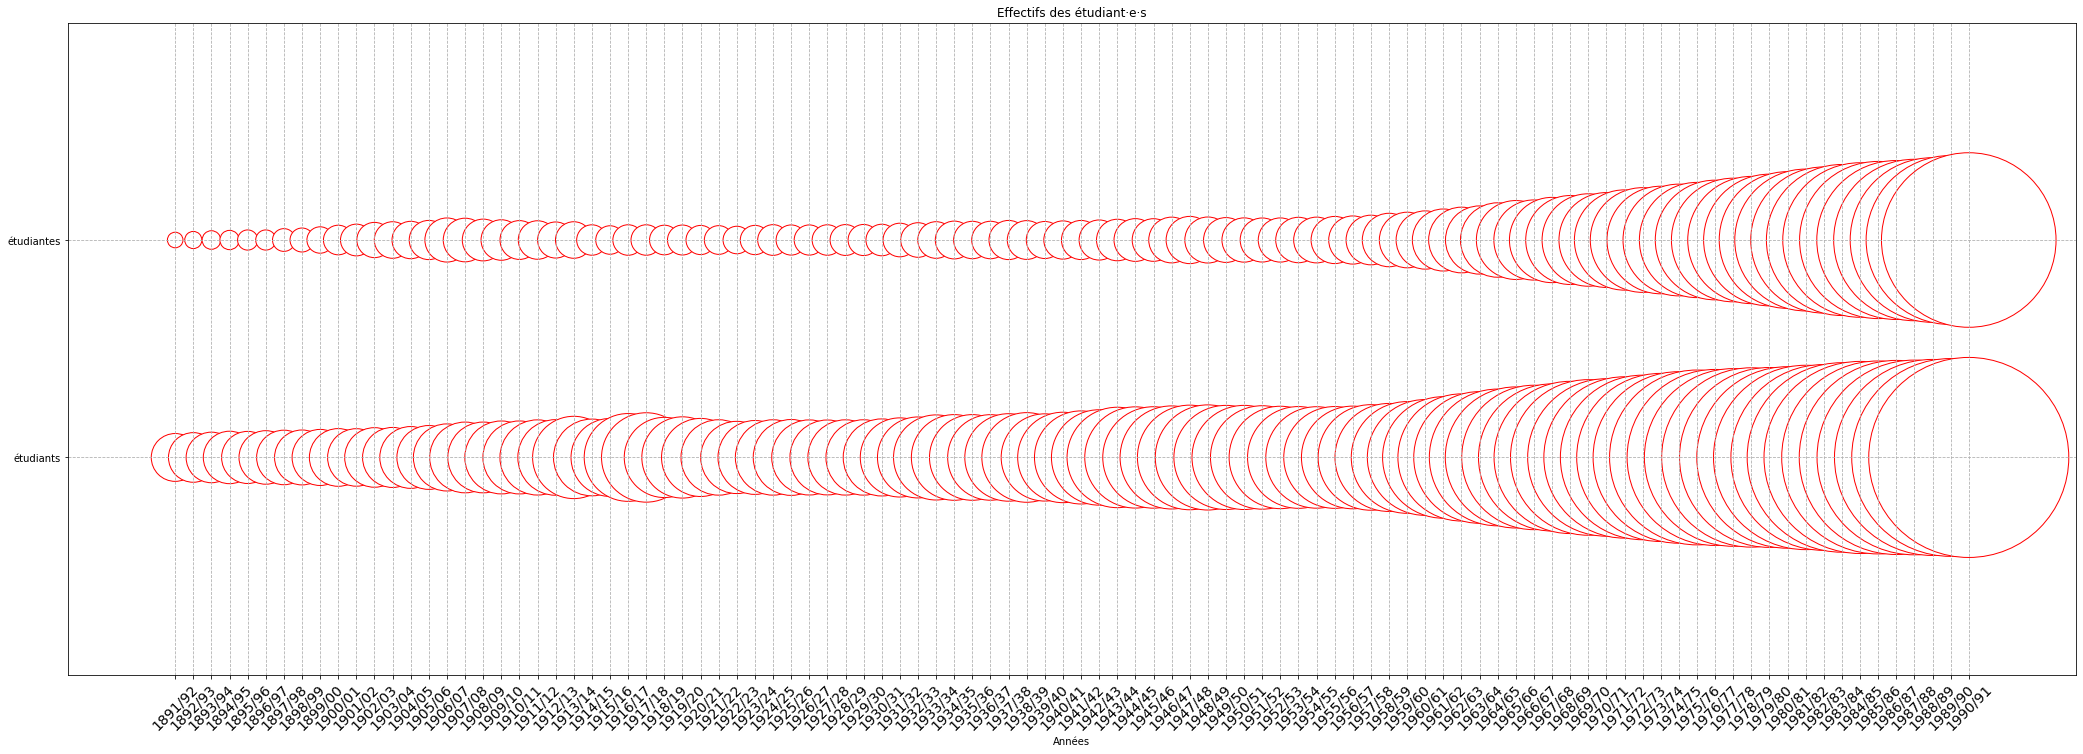

In [9]:

#create markersize column from values to better see the difference
#you probably want to edit this function depending on min, max, and range of values

fig = plt.figure(figsize=(36,12))

#plot categorical scatter plot
plt.scatter(abscisses_2, ordonnees, s = eff, edgecolors = "red", c = "white") # zorder = 2

plt.xticks(rotation=45, size= 14)
#plot grid behind markers
plt.title("Effectifs des étudiant·e·s")
plt.xlabel("Années")

plt.margins(y = 1, x = 0.06)
plt.grid(ls = "--", zorder = 1)
plt.savefig('graphics/effectifs_etudiantes_bubble_chart.jpg')
plt.show()

## Visualisation avec un diagramme à barres

Le diagramme à barre permet un meilleure visibilité des effectifs

Tikhonov Natalia, « Les universités suisses, pionnières de l’introduction de la mixité dans l’enseignement supérieur (1870-1930) », in: Houel Annik et Zancarini-Fournel Michelle (éds.), École et mixités, Lyon, Presses universitaires de Lyon, 2021 (Cahiers Masculin/Féminin), pp. 27‑35. En ligne: <http://books.openedition.org/pul/7083>, consulté le 28.03.2022.


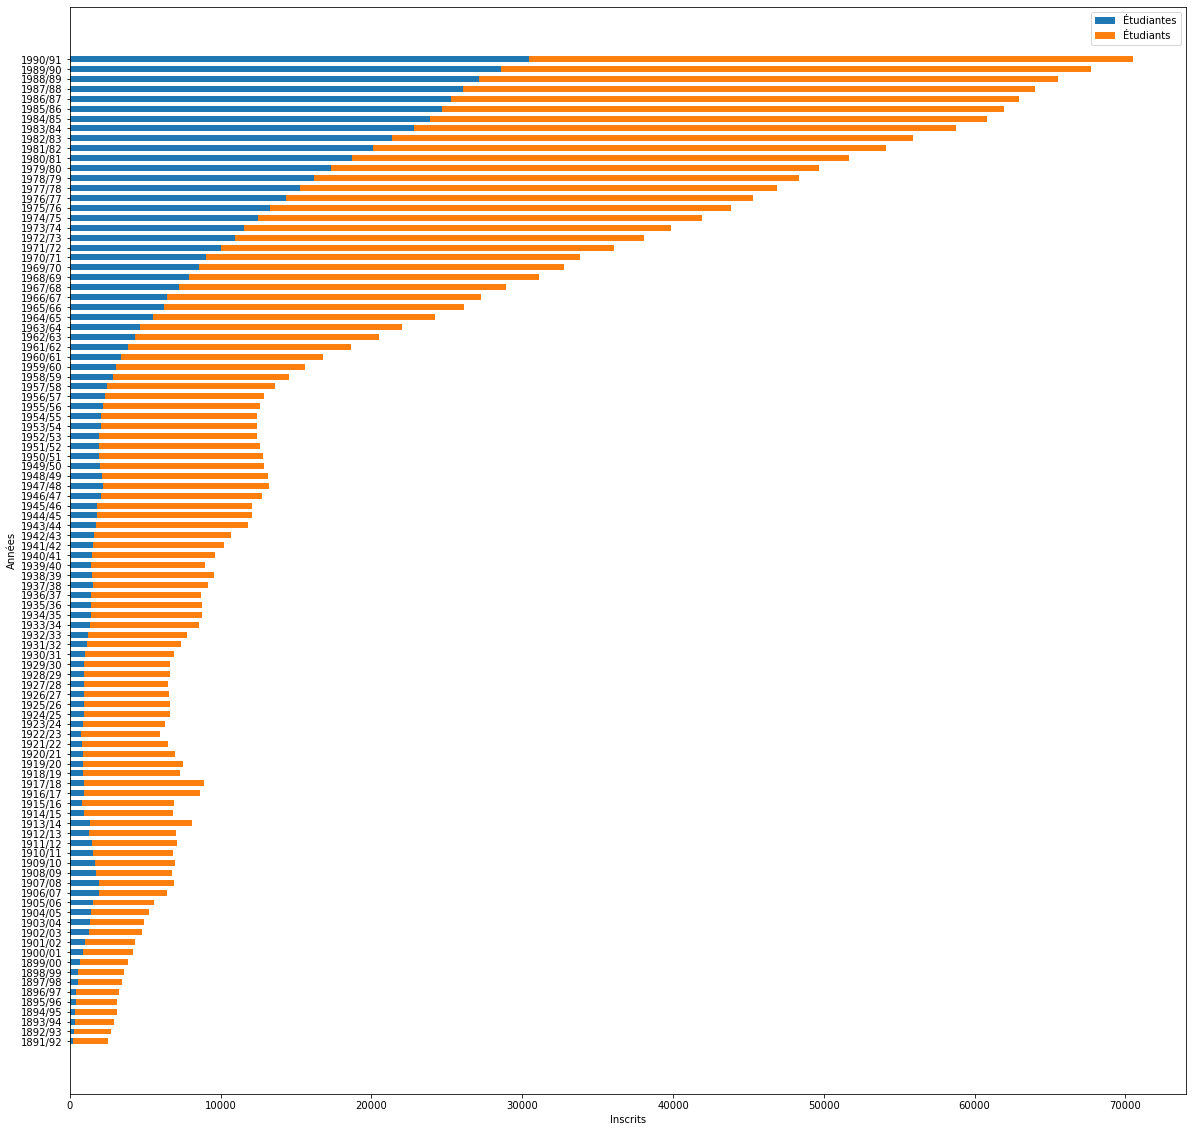

In [10]:
### Documentation:
#  https://pythonguides.com/stacked-bar-chart-matplotlib/
#  https://stackoverflow.com/questions/16653815/horizontal-stacked-bar-chart-in-matplotlib

fig = plt.figure(figsize=(20,20))


# Define width of stacked chart
w = 0.6

# Plot horizontal stacked bar chart : plt.barh

plt.barh(abscisses, eff_etudiantes, w, label='Étudiantes')
plt.barh(abscisses, eff_etudiants, w, left=eff_etudiantes, label='Étudiants')

# Add labels

plt.xlabel("Inscrits")
plt.ylabel("Années")


# Add legend, default content

plt.legend()


# Display
plt.show()

## Visualisation de la moyenne mobile

https://fr.wikipedia.org/wiki/Moyenne_mobile

On essaye ainsi de déceler une tendance dans les données, sur un lustre ou une décennie, afin de situer les pics dans une évolution générale.

Dans ce cas la moyenne mobile n'apporte pas d'information supplémentaire





In [13]:
### Définition de la fonction qui calcule la moyenne mobile
# https://stackoverflow.com/questions/14313510/how-to-calculate-rolling-moving-average-using-python-numpy-scipy
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return list(ret[n - 1:] / n)

In [14]:
eff_etudiants_mva = moving_average(eff_etudiants, 5) # utiliser 10, une décennie, et observer la différence
eff_etudiants_mva[:5]

[2555.4, 2670.8, 2773.0, 2864.2, 2942.4]

In [15]:
eff_etudiantes_mva = moving_average(eff_etudiantes, 5)
eff_etudiantes_mva[:5]

[332.0, 364.8, 409.6, 455.6, 520.6]

In [16]:
### Cette correction est nécessaire car les premières 9 valeurs manquent dans une moyenne lissée ainsi
#  multiplier par 9 si on observe une décennie
nn = [None]*4

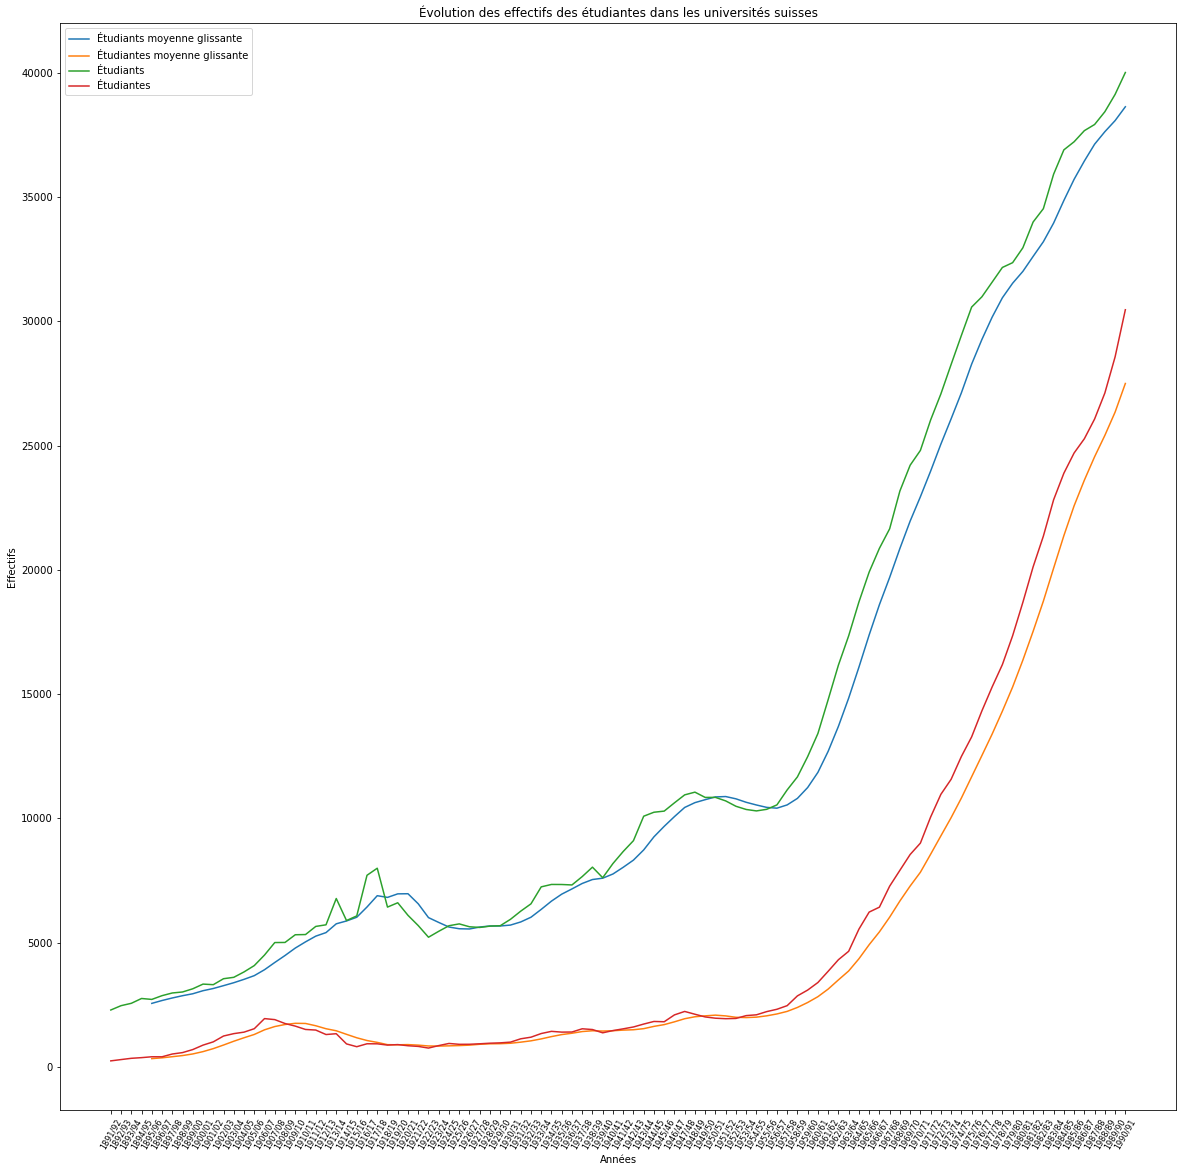

In [17]:
fig = plt.figure(figsize=(20,20))
plt.plot(abscisses, nn + eff_etudiants_mva, label = "Étudiants moyenne glissante")
plt.plot(abscisses, nn + eff_etudiantes_mva, label = "Étudiantes moyenne glissante")
### Comparer avec l'évolution des effectifs
#  On notera que le lustre paraît plus apte à représenter cette évolution
plt.plot(abscisses, eff_etudiants, label = "Étudiants")
plt.plot(abscisses, eff_etudiantes, label = "Étudiantes")
plt.xticks(rotation=60, size= 8)
plt.xlabel('Années')
plt.ylabel('Effectifs')
plt.title('Évolution des effectifs des étudiantes dans les universités suisses')
plt.legend()
plt.show()

## Vérifier si la croissance de 1900 ssv est présente dans toutes les Universités

La croissance générale peut dépendre de celle de certaines Universités particulières. Explorer les données et vérifier quelles Universités comportent une croissance spécifique

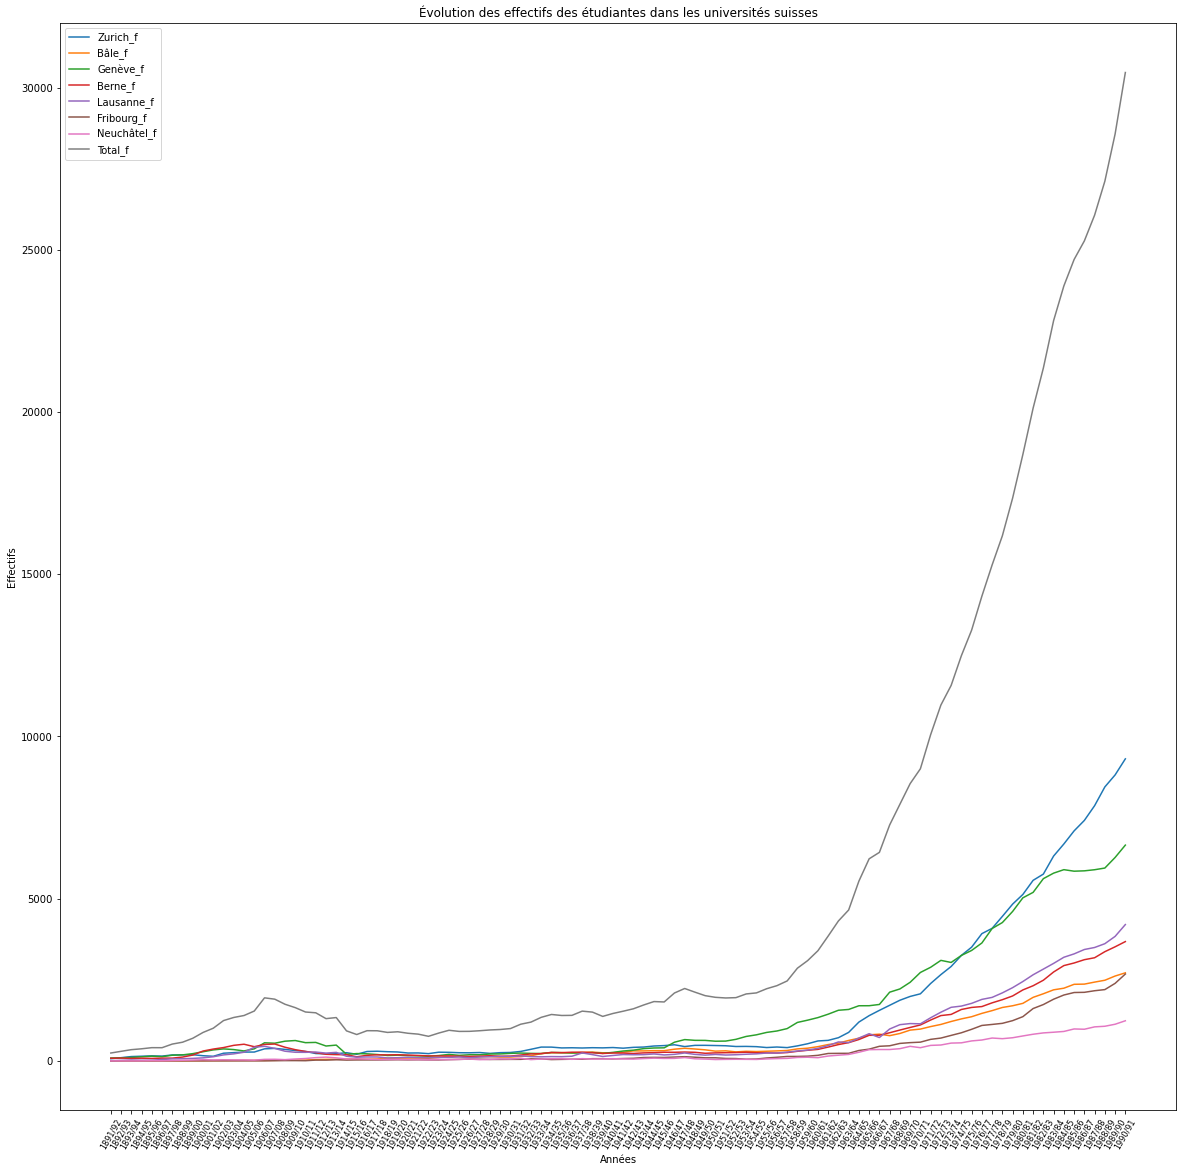

In [16]:
fig = plt.figure(figsize=(20,20))
for e in list(d[0].keys()):
        if '_f' in e:
            eff_e = []
            for l in d:
                if len(l[e]) > 0:
                    eff_e.append(int(l[e]))
                else:
                    eff_e.append(0)
            plt.plot(abscisses, eff_e, label = e)
plt.xticks(rotation=60, size= 8)
plt.xlabel('Années')
plt.ylabel('Effectifs')
plt.title('Évolution des effectifs des étudiantes dans les universités suisses')
plt.legend()
plt.show()

### Restreindre la période analysée



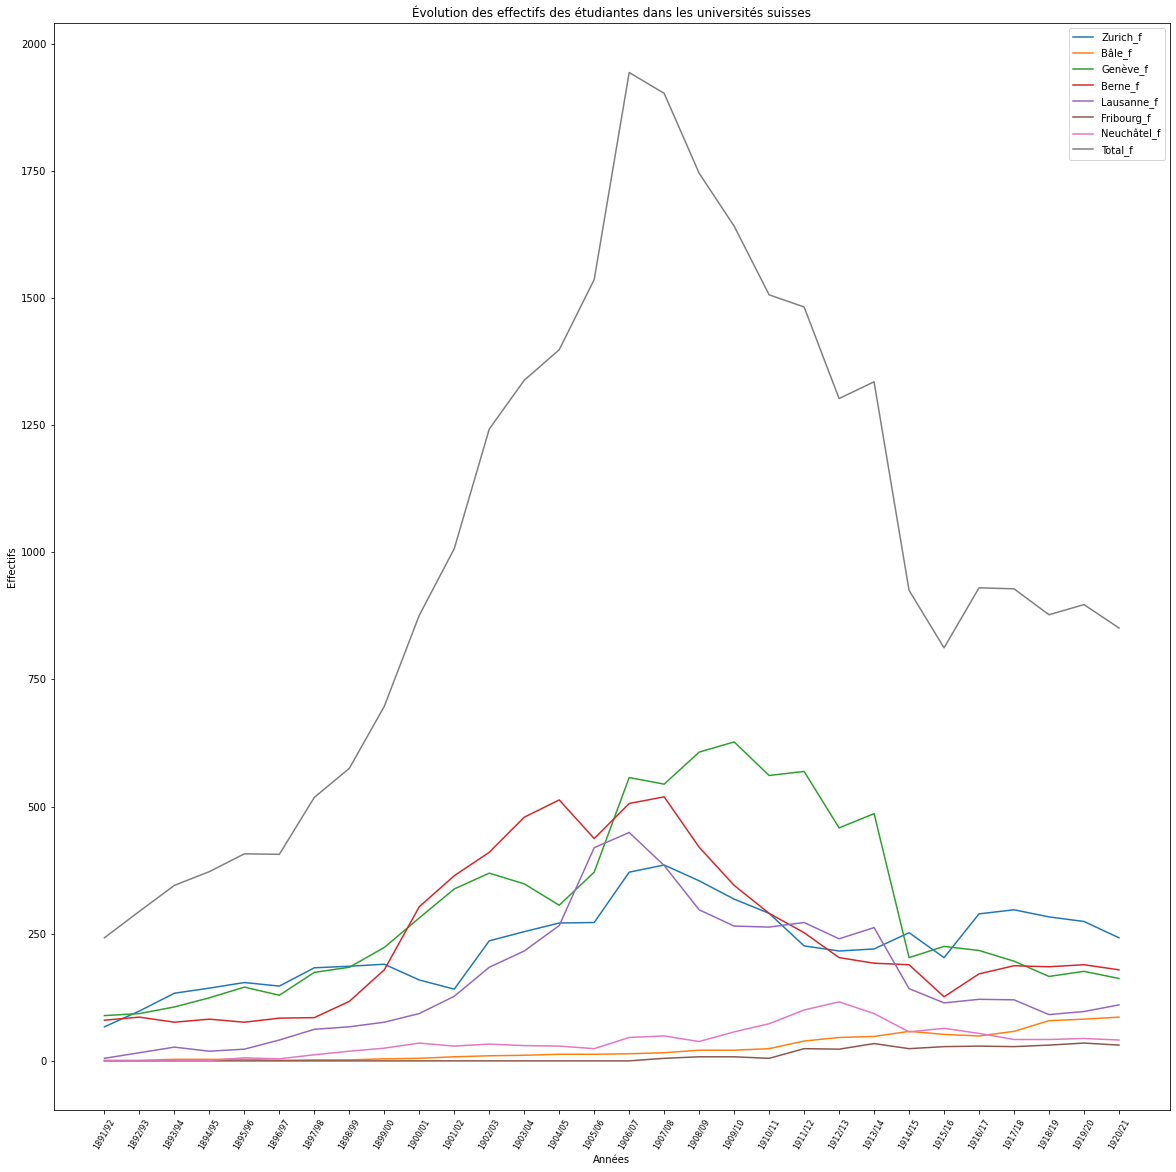

In [17]:
fig = plt.figure(figsize=(20,20))
for e in list(d[0].keys()):
        if '_f' in e:
            eff_e = []
            for l in d:
                if len(l[e]) > 0:
                    eff_e.append(int(l[e]))
                else:
                    eff_e.append(0)
            plt.plot(abscisses[:30], eff_e[:30], label = e)
plt.xticks(rotation=60, size= 8)
plt.xlabel('Années')
plt.ylabel('Effectifs')
plt.title('Évolution des effectifs des étudiantes dans les universités suisses')
plt.legend()
plt.savefig('graphics/etudiantes_f_pic_1906.jpg')
plt.show()

In [19]:
for e in list(d[0].keys()):
        if '_f' in e:
            print(e)

Zurich_f
Bâle_f
Genève_f
Berne_f
Lausanne_f
Fribourg_f
Neuchâtel_f
Total_f


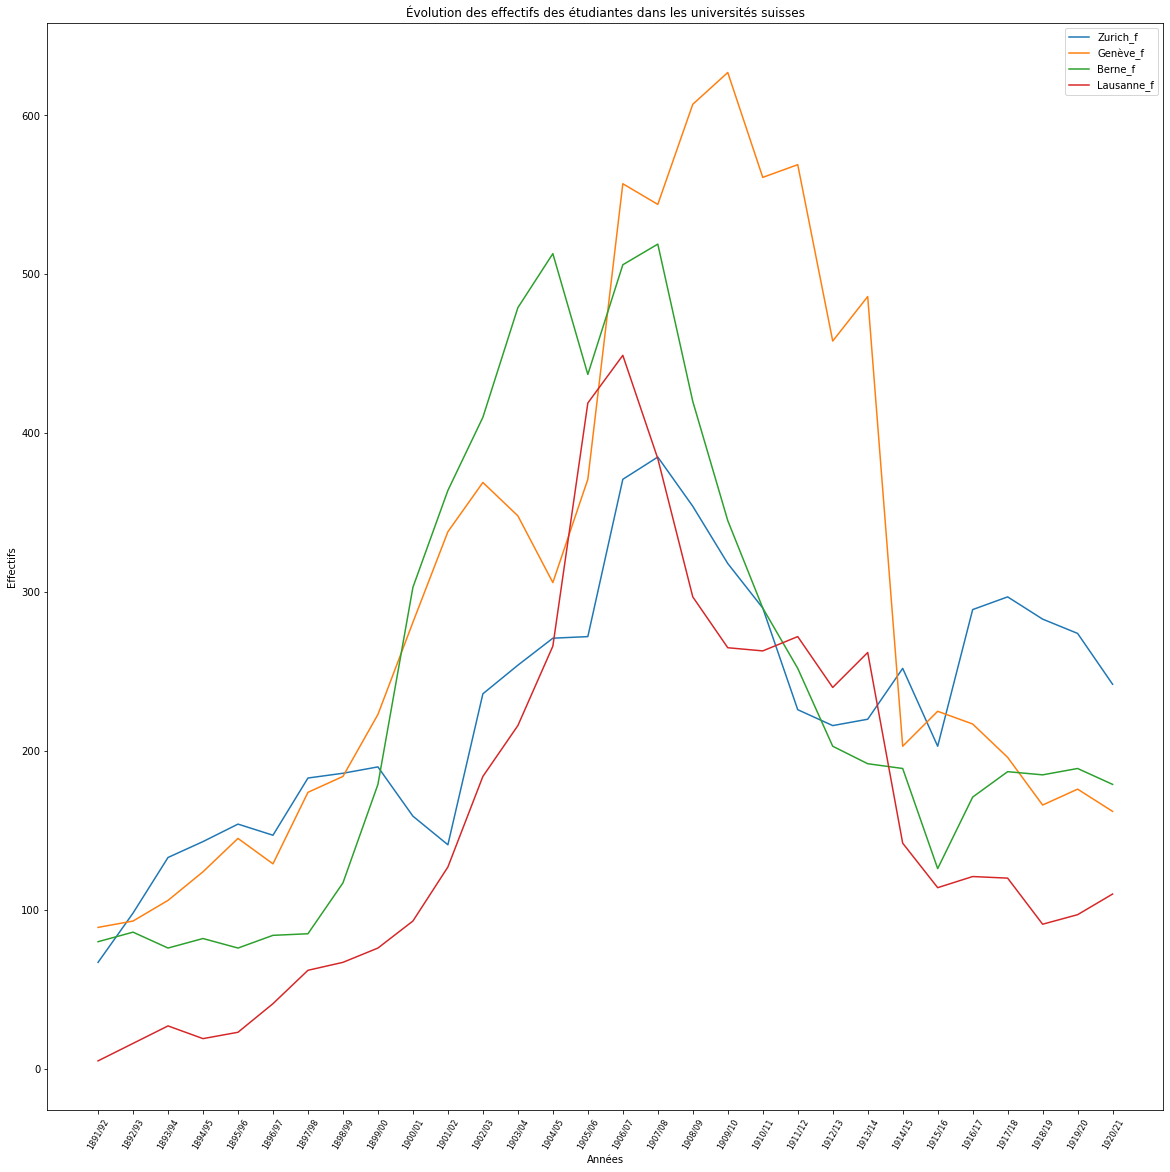

In [30]:
fig = plt.figure(figsize=(20,20))
for e in list(d[0].keys()):
    ### Uniquement les étudiantes de ces Universités
    if e in ('Lausanne_f', 'Zurich_f', 'Genève_f', 'Berne_f'):
        eff_e = []
        for l in d:
            if len(l[e]) > 0:
                eff_e.append(int(l[e]))
            else:
                eff_e.append(0)
        plt.plot(abscisses[:30], eff_e[:30], label = e)
plt.xticks(rotation=60, size= 8)
plt.xlabel('Années')
plt.ylabel('Effectifs')
plt.title('Évolution des effectifs des étudiantes dans les universités suisses')
plt.legend()
plt.savefig('graphics/etudiantes_f_pic_1906.jpg')
plt.show()

## Un diagramme a barre permet de voir plus clairement l'évolution des effectifs

In [31]:
### uniquement les étudiantes de ces universités
l_unis = ['Berne_f', 'Genève_f', 'Lausanne_f',  'Zurich_f']

# Produire les données à afficher, seulement les 30 premières années
eff_list = []
for e in l_unis:
        eff_e = []
        for l in d[:30]:
            eff_e.append(int(l[e]))              
        eff_list.append(eff_e)
eff_list[3][:5], len(eff_list)

([67, 98, 133, 143, 154], 4)

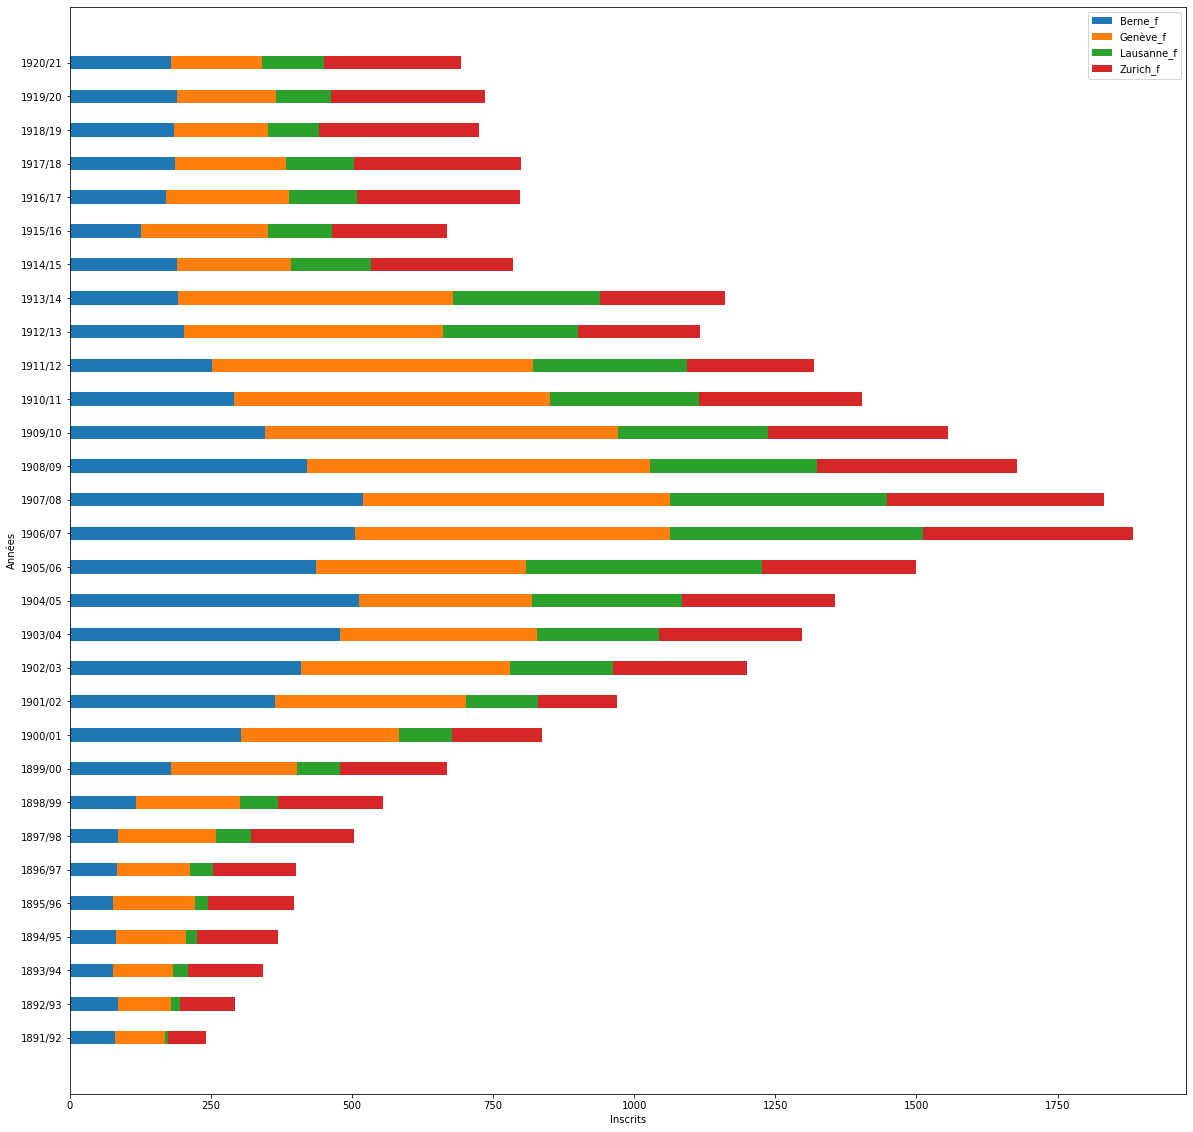

In [33]:
### Documentation:
#  https://pythonguides.com/stacked-bar-chart-matplotlib/
#  https://stackoverflow.com/questions/16653815/horizontal-stacked-bar-chart-in-matplotlib
#  https://python-graph-gallery.com/12-stacked-barplot-with-matplotlib

fig = plt.figure(figsize=(20,20))


# Define width of stacked chart
w = 0.4


l_unis = ['Berne_f', 'Genève_f', 'Lausanne_f',  'Zurich_f']

# Plot stacked bar chart
bl = [0]*30
i = 0
while i < 4 :
    plt.barh(abscisses[:30], eff_list[i], w, left=bl, label=l_unis[i])
    ## cette addition est nécessaire afin d'empiler les valeurs
    bl = np.add(bl,eff_list[i]).tolist()
    i += 1


# Add labels

plt.xlabel("Inscrits")
plt.ylabel("Années")


# Add legend, default content

plt.legend()


# Display
plt.show()

## Ajouter une colonne avec les effectifs des étudiants suisses

In [34]:
for e in list(d[0].keys()):
        if '_e' in e:
            print(e)

Zürich_e
Basel_e
Genf_e
Bern_e
Lausanne_e
Freiburg_e
Neuenburg_e
Total_e


In [35]:
### Données incompètes, stratégie A.:
#  restreindre le traitement aux données disponibles
for r in d:
    if r['Année'] < '1986/87':
        r['Total_s'] = int(r['Total']) - int(r['Total_e'])
d[0]

{'Année': '1891/92',
 'Zürich': '543',
 'Basel': '401',
 'Genf': '536',
 'Bern': '534',
 'Lausanne': '289',
 'Freiburg': '168',
 'Neuenburg': '60',
 'Total': '2531',
 'Zurich_f': '67',
 'Bâle_f': '1',
 'Genève_f': '89',
 'Berne_f': '80',
 'Lausanne_f': '5',
 'Fribourg_f': '0',
 'Neuchâtel_f': '0',
 'Total_f': '242',
 'Zürich_e': '192',
 'Basel_e': '75',
 'Genf_e': '347',
 'Bern_e': '126',
 'Lausanne_e': '89',
 'Freiburg_e': '56',
 'Neuenburg_e': '1',
 'Total_e': '886',
 'Total_h': '2289',
 'Total_s': 1645}

In [40]:
### Données incompètes, stratégie B.:
#  remplacer les valeurs absentes par une valeur 0 ou chaîne de caractères vide ('')
for r in d:
    if len(r['Total_e']) > 0:
        r['Total_s'] = int(r['Total']) - int(r['Total_e'])
    else:
        r['Total_s'] = 0
d[-3]

{'Année': '1988/89',
 'Zürich': '20145',
 'Basel': '6685',
 'Genf': '11500',
 'Bern': '9295',
 'Lausanne': '10092',
 'Freiburg': '5439',
 'Neuenburg': '2394',
 'Total': '65550',
 'Zurich_f': '8445',
 'Bâle_f': '2485',
 'Genève_f': '5944',
 'Berne_f': '3366',
 'Lausanne_f': '3612',
 'Fribourg_f': '2197',
 'Neuchâtel_f': '1067',
 'Total_f': '27116',
 'Zürich_e': '1986',
 'Basel_e': '918',
 'Genf_e': '',
 'Bern_e': '486',
 'Lausanne_e': '',
 'Freiburg_e': '1273',
 'Neuenburg_e': '',
 'Total_e': '',
 'Total_h': '38434',
 'Total_s': 0}

In [42]:
### Ecrire un nouveau fichier avec les nouveaux 
file_3 = 'data/etudiantes_universites_suisses_v3.csv'

In [46]:
colonnes = list(d[0].keys())
colonnes[-5:]

['Freiburg_e', 'Neuenburg_e', 'Total_e', 'Total_h', 'Total_s']

In [47]:
### Documentation : 
#  https://docs.python.org/3/library/csv.html#csv.DictWriter
with open(file_3, 'w') as f:
    fw = csv.DictWriter(f, fieldnames=colonnes,delimiter='\t')
    
    fw.writeheader()
    for r in d:
        fw.writerow(r)

In [48]:
# créer une liste vide
result_file = []

with open(file_3, 'r') as data:
      a = csv.DictReader(data, delimiter='\t')
      d = list(a)
len(d), d[0]

(100,
 {'Année': '1891/92',
  'Zürich': '543',
  'Basel': '401',
  'Genf': '536',
  'Bern': '534',
  'Lausanne': '289',
  'Freiburg': '168',
  'Neuenburg': '60',
  'Total': '2531',
  'Zurich_f': '67',
  'Bâle_f': '1',
  'Genève_f': '89',
  'Berne_f': '80',
  'Lausanne_f': '5',
  'Fribourg_f': '0',
  'Neuchâtel_f': '0',
  'Total_f': '242',
  'Zürich_e': '192',
  'Basel_e': '75',
  'Genf_e': '347',
  'Bern_e': '126',
  'Lausanne_e': '89',
  'Freiburg_e': '56',
  'Neuenburg_e': '1',
  'Total_e': '886',
  'Total_h': '2289',
  'Total_s': '1645'})

## Visualiser et comparer les effectifs d'étudiants suisses et étranger et leur évolution dans le temps